In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [127]:
data = pd.read_csv('games.csv')
print(data.shape)

(81312, 20)


In [128]:
data.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [129]:
data.dtypes

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object

In [130]:
data.describe(include='all')

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81312,81271,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
unique,NaN,2,76035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,boardgame,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,70820,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,72278.150138,NaN,NaN,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,NaN,NaN,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,NaN,NaN,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,NaN,NaN,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,NaN,NaN,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,NaN,NaN,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700


In [131]:
data.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

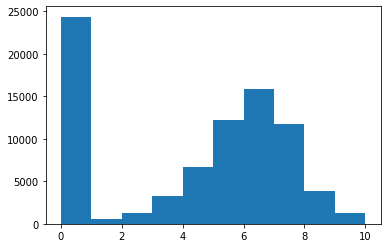

In [132]:
plt.hist(data["average_rating"])

In [133]:
data[data["average_rating"] == 0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [134]:
data[data["average_rating"] > 0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

In [135]:
data = data[data["users_rated"] > 0]

In [136]:
data = data.dropna(axis=0)

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

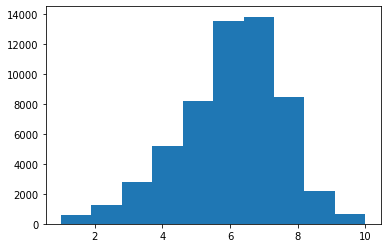

In [137]:
plt.hist(data["average_rating"])

In [138]:
corr = data.corr()

In [139]:
fig = plt.figure(figsize = (12,9))

<Figure size 864x648 with 0 Axes>

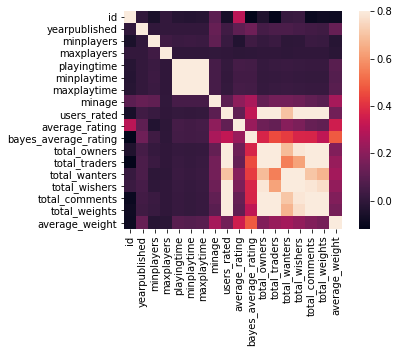

In [140]:
sns.heatmap(corr, vmax=0.8, square = True)

In [141]:
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [142]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type","name","id"]]
target_variable = "average_rating"

In [143]:
# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [144]:
train.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
10853,2361,boardgame,U.F.O.s,1992.0,3.0,6.0,45.0,45.0,45.0,10.0,36,5.45833,5.49787,101,10,3,1,12,5,1.800
17538,9649,boardgame,Jack Diamond Electronic Blackjack,2001.0,1.0,7.0,10.0,10.0,10.0,18.0,8,5.00000,0.00000,13,1,0,0,4,1,1.000
12089,26205,boardgame,Monopoly: Euro,2000.0,2.0,6.0,120.0,120.0,120.0,8.0,84,5.10833,5.45038,151,9,0,3,18,8,2.125
54056,93164,boardgame,Spline,2011.0,2.0,2.0,10.0,10.0,10.0,6.0,18,5.69444,0.00000,9,0,1,3,11,3,1.000
70120,152096,boardgame,The Bitcoin Harvest,2013.0,2.0,12.0,15.0,15.0,15.0,7.0,2,7.50000,0.00000,2,0,0,0,0,1,2.000


In [145]:
test.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
42670,40143,boardgame,Game of 31,1800.0,2.0,2.0,3.0,3.0,3.0,0.0,4,3.50000,0.00000,2,0,0,1,1,0,0.0000
46993,58979,boardgame,Gameplan,2003.0,2.0,0.0,0.0,0.0,0.0,8.0,1,4.00000,0.00000,2,1,0,0,2,0,0.0000
73293,162074,boardgame,Darkfast Dungeons,2015.0,1.0,6.0,120.0,120.0,120.0,0.0,3,7.66667,0.00000,7,0,3,7,1,0,0.0000
3764,4854,boardgame,7th Fleet,1987.0,2.0,2.0,120.0,120.0,120.0,12.0,314,7.05281,5.96266,769,20,36,55,120,47,3.6170
4234,1681,boardgame,Tokyo Express,1988.0,1.0,2.0,180.0,180.0,180.0,12.0,223,6.98565,5.84665,858,30,80,163,140,49,3.9592


In [146]:
# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target_variable])

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target_variable])

2.1365835060240927

In [147]:
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target_variable])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target_variable])

1.477357198219484